In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc,RocCurveDisplay
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA

In [5]:
from ucimlrepo import fetch_ucirepo
digits = fetch_ucirepo(id=80)
X = digits.data.features        
y = digits.data.targets 
X.head()


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


In [6]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 64 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   5620 non-null   int64
 1   Attribute2   5620 non-null   int64
 2   Attribute3   5620 non-null   int64
 3   Attribute4   5620 non-null   int64
 4   Attribute5   5620 non-null   int64
 5   Attribute6   5620 non-null   int64
 6   Attribute7   5620 non-null   int64
 7   Attribute8   5620 non-null   int64
 8   Attribute9   5620 non-null   int64
 9   Attribute10  5620 non-null   int64
 10  Attribute11  5620 non-null   int64
 11  Attribute12  5620 non-null   int64
 12  Attribute13  5620 non-null   int64
 13  Attribute14  5620 non-null   int64
 14  Attribute15  5620 non-null   int64
 15  Attribute16  5620 non-null   int64
 16  Attribute17  5620 non-null   int64
 17  Attribute18  5620 non-null   int64
 18  Attribute19  5620 non-null   int64
 19  Attribute20  5620 non-null   int64
 20  Attribut

In [7]:
X.describe()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
count,5620.0,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.0,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,...,3.737900,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093
std,0.0,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,...,4.906909,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,...,16.000000,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [9]:

X.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
              ..
Attribute60    0
Attribute61    0
Attribute62    0
Attribute63    0
Attribute64    0
Length: 64, dtype: int64

In [10]:
X.duplicated().sum()

np.int64(0)

In [11]:

X.shape

(5620, 64)

In [12]:
X.size

359680

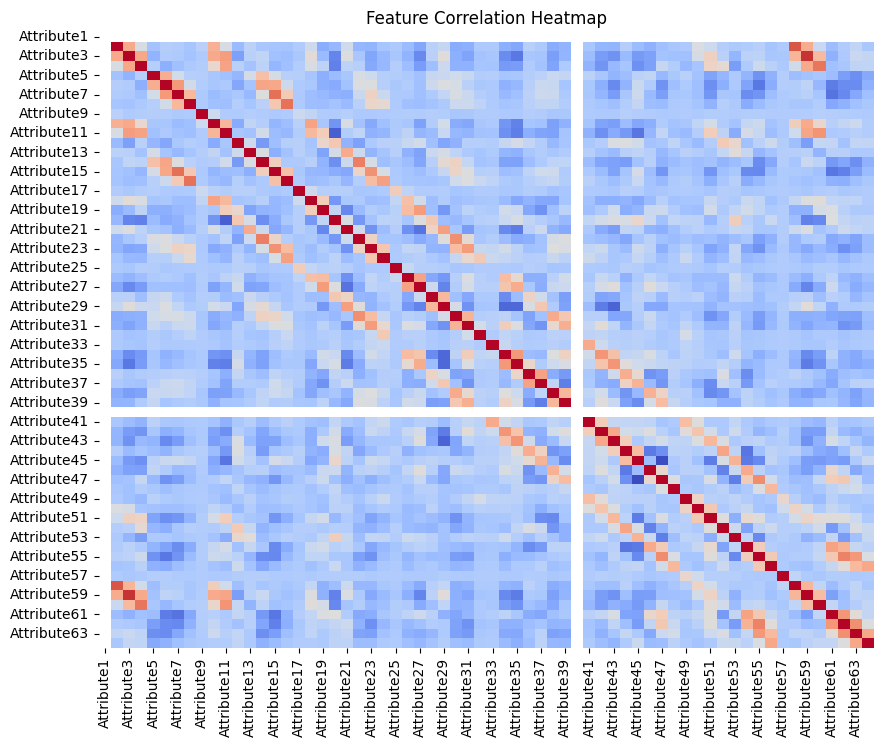

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap="coolwarm", cbar=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
from ucimlrepo import fetch_ucirepo
digits = fetch_ucirepo(id=80)
X = digits.data.features   
y = digits.data.targets.values.ravel()

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) 

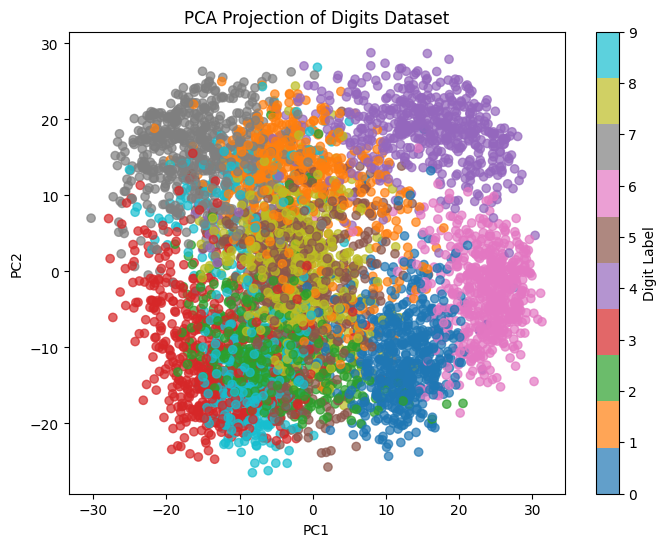

In [20]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("PCA Projection of Digits Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [21]:
feature_name = X.columns


In [22]:
loadings = pd.DataFrame(
    pca.components_.T,  
    columns=["PC1", "PC2"],
    index=feature_name  
)

print("Feature contributions to PC1 and PC2:")
print(loadings)

Feature contributions to PC1 and PC2:
                  PC1       PC2
Attribute1   0.000000 -0.000000
Attribute2  -0.015158 -0.013751
Attribute3  -0.164802 -0.175415
Attribute4  -0.090766 -0.152106
Attribute5  -0.098777  0.081262
...               ...       ...
Attribute60 -0.077055 -0.161881
Attribute61  0.157434 -0.180054
Attribute62  0.105263 -0.236884
Attribute63  0.036905 -0.102956
Attribute64  0.000055 -0.012437

[64 rows x 2 columns]


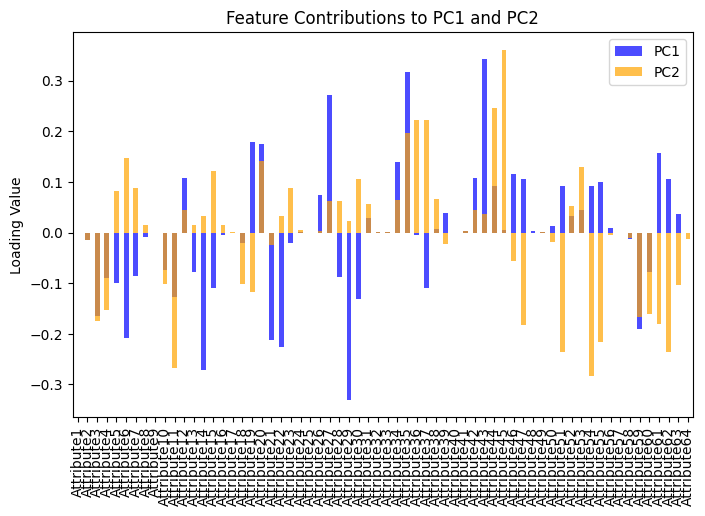

In [23]:
plt.figure(figsize=(8,5))
loadings["PC1"].plot(kind="bar", alpha=0.7, color="blue", label="PC1")
loadings["PC2"].plot(kind="bar", alpha=0.7, color="orange", label="PC2")
plt.title("Feature Contributions to PC1 and PC2")
plt.ylabel("Loading Value")
plt.legend()
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', gamma=0.01, C=10, probability=True)  # probability=True for ROC
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    
    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}

results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.963523   0.963537  0.963461  0.963464
KNN                  0.988434   0.988577  0.988416  0.988457
Random Forest        0.987544   0.987717  0.987531  0.987565
SVM                  0.879004   0.944170  0.879144  0.896447


In [26]:
pca_full = PCA()
pca_full.fit(X_scaled)
expl_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(expl_var)

n_components = np.argmax(cum_var >= 0.95) + 1
print("Number of components for 95% variance:", n_components)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
print("Shape after PCA:", X_pca.shape)

Number of components for 95% variance: 42
Shape after PCA: (5620, 42)


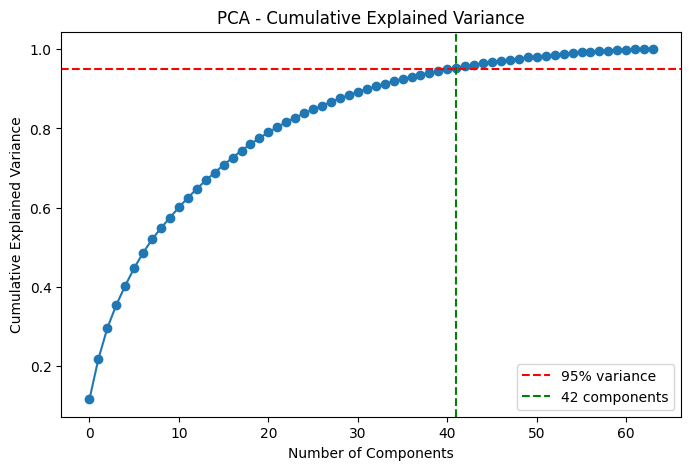

In [27]:
plt.figure(figsize=(8,5))
plt.plot(cum_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% variance")
plt.axvline(x=n_components-1, color='g', linestyle='--', label=f"{n_components} components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.legend()
plt.show()

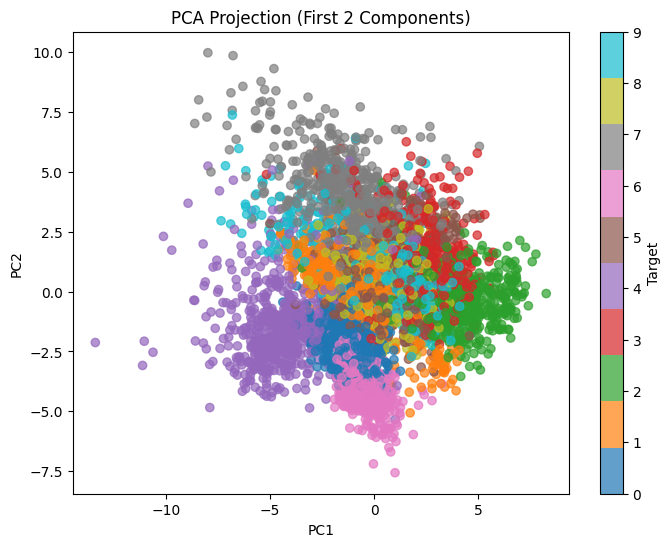

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.colorbar(label="Target")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (First 2 Components)")
plt.show()

In [29]:
import pickle

best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Best model saved as best_model.pkl")


Best model saved as best_model.pkl
